<a href="https://colab.research.google.com/github/OriRoth22/AIbook/blob/master/ImageProcessingEx_03_BinaryImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing Assignment 3: Binary images

Before we start, please put your names and IDs in following format

: Firstname LASTNAME, #00000000   //   (e.g.) Dana LEVI, #12345678

**Your Answer:**   
Xxxxx XXXXX, #nnnnnn

In this exercise, you will implement **Binary Images** algorithms.

Methods: as explained in class.

Notes:
*   Write your code in the dedicated areas (TODO blocks). You can add helper functions.
*   Submission email should include a link to the Colab submission notebook located on your Google Drive with Commenter access right to nev1958a@gmail.com
*   The solution notebook should be able to be run (‘Run all’) with no errors.
In case of errors, the submission will be disqualified.
*   The grade will depend on correct performance on several grayscale images and on clean programming and documentation.
*   Do not forget to add the Names and Student I.D. at the top of the notebook.
*   All images are given as 2-dimensional matrices of type `float`, with values in the range [0..1].
*   Pay Attention! In the following functions, the returned images must be the same size as the original Images!

Please implement the following functions:
1. Write the `tag_connected_components` function which finds the connected components in a binary image and returns a matrix with the same size in which each connected component is tagged with a different label. The tags should be sequential.
2. Write the `skeletonizeImage` function which skeletonizes objects in a given binary image and returns the new binary image.

**Note** In these images, **1** represents the object, and **0** (black) represents the background.

## Setup Code
Before getting started, we need to run some boilerplate code to set up our environment. You will need to rerun this setup code each time you start the notebook.

In [1]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

In [3]:
def read_file(file_name:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        file_name: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, file_name)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [4]:
def pretty_print(img):
    ''' pretty printing of binary imagees and connected components - by
    replacing zeros with whitespaces.
    Args:
        img: image in float format (range: 0..1) - the source binary image
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    for r in range(img.shape[0]):
        l = [str(img[r,c].astype(np.int16)) if img[r,c]>0 else ' ' for c in range(img.shape[1])]
        print(''.join(map(str, l)))

In [5]:
def plot_images(img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    axes[0].imshow(img1,  cmap='gray')
    axes[1].imshow(img2,  cmap='gray')

## `tag_connected_components`

In [12]:
def check_neigbors(ing_new,burn,ans,i,j,tag) -> bool:
  burn [i,j]=1
  ans[i,j]=tag
  if i>0 and ing_new[i-1,j]==1 and burn[i-1,j]==0:
    check_neigbors(ing_new,burn,ans,i-1,j,tag)
  if j>0 and ing_new[i,j-1]==1 and burn[i,j-1]==0:
    check_neigbors(ing_new,burn,ans,i,j-1,tag)
  if i>0 and ing_new[i+1,j]==1 and burn[i+1,j]==0:
    check_neigbors(ing_new,burn,ans,i+1,j,tag)
  if j>0 and ing_new[i,j+1]==1 and burn[i,j+1]==0:
    check_neigbors(ing_new,burn,ans,i,j+1,tag)

  return ans




In [16]:
def tag_connected_components(img: np.array) -> np.array:
    '''
    This function receives a binary image and finds the connected components
    in it and returns a matrix with the same size in which each connected
    componnent is tagged with a different label. The tags should be sequential.

    Args:
        img: image in float format (range: 0..1) - the source binary image

    Returns:
        img_new: in float format - the image with components tagging in a
        2-dimensional matrice
    '''
    img_new= procces_img(img)
    return img_new

def procces_img(img: np.array) -> np.array:
  ing_new = img.copy()
  burn= np.zeros(img.shape)
  ans= np.zeros(img.shape)
  tag = 1
  for i in range (len (ing_new)):
    for j in range (len(ing_new[0])):
      if ing_new[i,j]==1:
        if burn [i,j]==0:
          ans = check_neigbors(ing_new,burn,ans,i,j,tag)
          tag+=1

  return ans

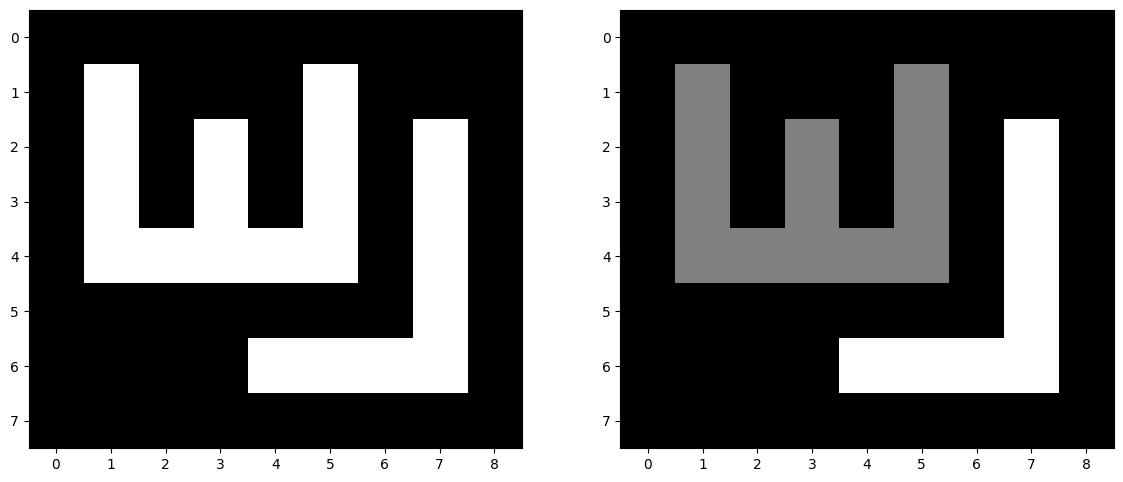

In [17]:
img = np.array([[0,0,0,0,0,0,0,0,0],
       [0,1,0,0,0,1,0,0,0],
       [0,1,0,1,0,1,0,1,0],
       [0,1,0,1,0,1,0,1,0],
       [0,1,1,1,1,1,0,1,0],
       [0,0,0,0,0,0,0,1,0],
       [0,0,0,0,1,1,1,1,0],
       [0,0,0,0,0,0,0,0,0]])
img_n = tag_connected_components(img)
plot_images(img, img_n)

In [18]:
pretty_print(img_n)

         
 1   1   
 1 1 1 2 
 1 1 1 2 
 11111 2 
       2 
    2222 
         


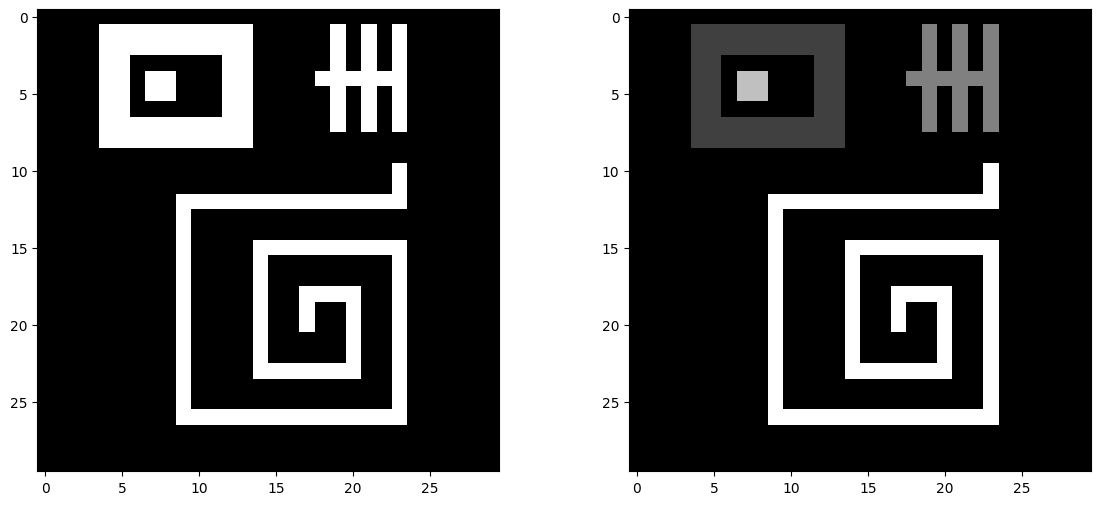

In [19]:
img = read_file('binary1.tiff') / 255
img_n = tag_connected_components(img)
plot_images(img, img_n)

In [20]:
pretty_print(img_n)

                              
    1111111111     2 2 2      
    1111111111     2 2 2      
    11      11     2 2 2      
    11 33   11    222222      
    11 33   11     2 2 2      
    11      11     2 2 2      
    1111111111     2 2 2      
    1111111111                
                              
                       4      
                       4      
         444444444444444      
         4                    
         4                    
         4    4444444444      
         4    4        4      
         4    4        4      
         4    4  4444  4      
         4    4  4  4  4      
         4    4  4  4  4      
         4    4     4  4      
         4    4     4  4      
         4    4444444  4      
         4             4      
         4             4      
         444444444444444      
                              
                              
                              


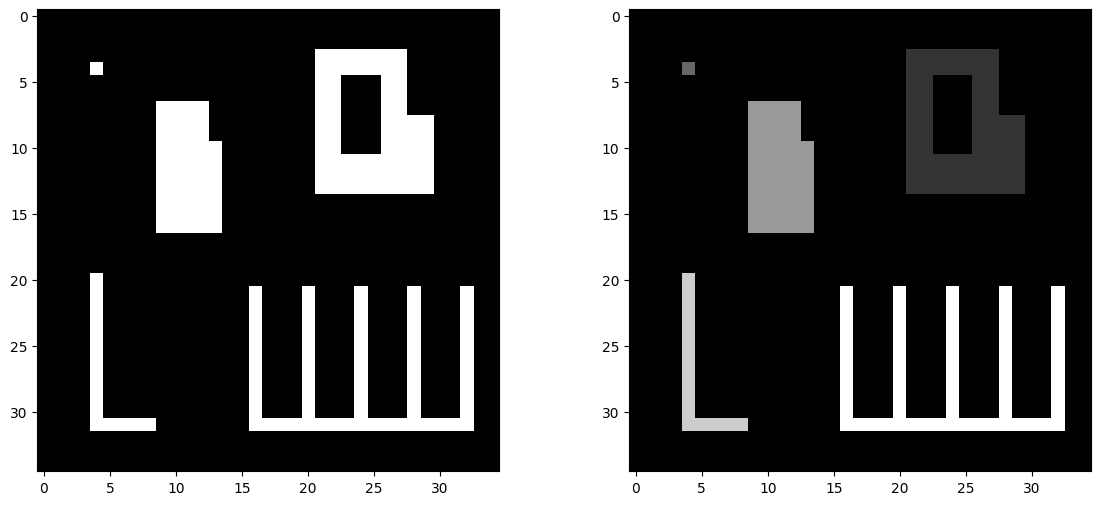

In [21]:
img = read_file('binary2.tiff') / 255
img_n = tag_connected_components(img)
plot_images(img, img_n)

In [22]:
pretty_print(img_n)

                                   
                                   
                                   
                     1111111       
    2                1111111       
                     11   11       
                     11   11       
         3333        11   11       
         3333        11   1111     
         3333        11   1111     
         33333       11   1111     
         33333       111111111     
         33333       111111111     
         33333       111111111     
         33333                     
         33333                     
         33333                     
                                   
                                   
                                   
    4                              
    4           5   5   5   5   5  
    4           5   5   5   5   5  
    4           5   5   5   5   5  
    4           5   5   5   5   5  
    4           5   5   5   5   5  
    4           5   5   5   5   5  
    4           5   5   5   

## `skeletonizeImage `

In [28]:
def give_value(img_new,img, i,j) -> np.array:
    a= np.min(img[i-1,j],img[i+1,j])

    b= np.min (img[i,j-1]   , img[i,j+1])
    img_new[i,j]= np.min( b, a)+1
    return img_new

In [29]:
def skeletonizeImage (img: np.array) -> np.array:
    '''
    This function receives a binary image and finds the connected components
    in it and returns a new binary image with skeletonize objects.

    Args:
        img: image in float format (range: 0..1) - the source binary image

    Returns:
        img_new: in float format (range: 0..1) - the image with skeleton
                    in a 2 dimensional matrice.
    '''
    ans = img_new = np.zeros(img.shape)
    img_new= img.copy()
    for i in range (len (img)):
      for j in range (len(img[0])):
        if img[i,j]==1:
          img_new= give_value(img_new,img,i,j)

    print (img_new)
    return img_new

In [30]:
img = np.array([[0,0,0,0,0,0,0,0,0],
                [0,1,1,1,1,1,1,1,0],
                [0,1,1,1,1,1,1,1,0],
                [0,1,1,1,1,1,1,1,0],
                [0,0,0,1,1,1,0,0,0],
                [0,0,0,1,1,1,0,0,0],
                [0,0,0,1,1,1,0,0,0],
                [0,0,0,1,1,1,0,0,0],
                [0,0,0,0,0,0,0,0,0]])
img_new = skeletonizeImage(img)
plot_images(img, img_new)

AxisError: axis 1 is out of bounds for array of dimension 0

In [ ]:
img = read_file('binary1.tiff') / 255
img_n = skeletonizeImage(img)
plot_images(img, img_n)

In [ ]:
img = read_file('binary2.tiff') / 255
img_n = skeletonizeImage(img)
plot_images(img, img_n)